# 1.Nagler's Example

Population size: 3000
Infected at t=0: 7
R0= 2.6
R_eff=1 at t= 28 d


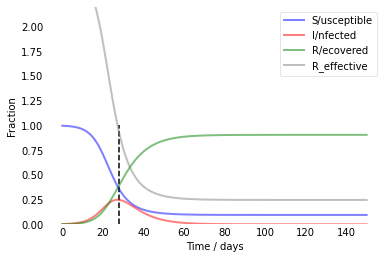

In [1]:
# Basic SIR model (adapted) Jan Nagler (speak Sir Jan Nagler), v2
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Population size
N = 3000

# Initial conditions: 7 Infected, no Recovered individuals
I0, R0 = 7, 0 #case zero

# All others, S=N-I-R susceptible, initially S0=N-I0-R0
S0 = N - I0 - R0 #normalization

# Contact rate, beta, how agressive virus is; 
# Recovery rate, gamma, here assumes no death!!! 0.15 meaning revover ove 1 week: 1/7 = 0.15... depends on the interpretation using days/ hours/ seconds... always 1 over duration we defined
beta, gamma = 0.39, 0.15

# Basic reproduction number R0 (speak R nought), average number of individuals that get infected over the period where an infected person is infectious at time 0 where no one is infected 
# gamma gives the time scale used to calculate recovery rate 
# R0 is direct proportional to beta
R_nought = beta / gamma #logic not explained 

# by pure logic, or following the literature
# https://www.healthknowledge.org.uk/public-health-textbook/research-methods/1a-epidemiology/epidemic-theory
# R_effective = R_nought * S/N, as used in the plot

print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)

# A grid of time points (in days)
t = np.linspace(0, 150, 150)

# SIR model (coupled nonlinear system of ODEs)
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N #for all N that are not =1
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

#1/gamma average time to recover

# Initial conditions vector
y0 = S0, I0, R0

# Integrate the SIR equations over the time grid t.
# args takes all parameters
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # return 3 vectors

#find R_effective = 1 time
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1: 
        t_1 = time
        break
print("R_eff=1 at t=", t_1, "d")


# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# 2.Question-1 (a)

The SIR model is a 3-compartment model.  Extend this model to 4 com-partments,  where  the  4th  compartment  is  for  deaths  (D).  Mortality  ismodelled by new transitions fromI→Ddefined by the mortality rateμ.Susceptible and Recovered do not die.(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

Population size: 3000
Infected at t=0: 10
R0= 1.6666666666666667
R_eff=1 at t= 25 d


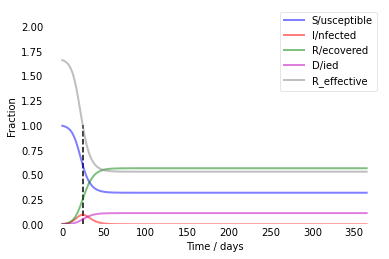

In [5]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.5 # = 1 /2 days 
Ɣ = 0.25 # = 1 /4 days
μ = 0.05 # = 1 /20 days
# Using "1 day" as time unit, on average β people are infected per day or 1 person is infected every 1/β days; at the same time, on average Ɣ people recover per day or 1 person recovers every 1/Ɣ days; at the same time, on average μ people die per day or 1 person dies every 1/μ days

R_nought = β / (Ɣ + μ) 
# R_nought is previously measured as β/Ɣ, the number of infected people over the number of recovered people, which gives a base-line infectiousness of COVID as its the fundamental property. At time 0, R_nought is directly proportional to β and inversely preportional to Ɣ. R_nought is dependent on β and Ɣ. 

# By introducing the parameter μ, the death rate, we add one more scenario after infection. Therefore, among β infected people, Ɣ people will recover and μ people will die in a time unit. All three parameters are fundamental properties of COVID. To reflect this added scenario, we need to add μ to Ɣ. Now at time 0, R_nought is still directly proportional to β,but inversely preportional to the sum of Ɣ and μ. Therefore, R_nought now is dependent on β, Ɣ and μ. 

# Set time range: 365 days;  Time scale/step: 1 day
t = np.linspace(0, 365, 365)# A grid of time points (in days)

######## SIRD model 
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I /(N - μ * I)
    dIdt = β * S * I /(N - μ * I) - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIRD equations over the time grid t. args takes all parameters
ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
S, I, R, D = ret.T # return 4 vectors

#find the time when R_effective = 1, R_effective = R_nought * S/N, as used in the plot
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time]/N < 1:  
        t_1 = time
        break

#Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",R_nought)
print("R_eff=1 at t=", t_1, "d")

# Plot the data on three separate curves for S(t), I(t) and R(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D/N, 'm', alpha=0.5, lw=2, label='D/ied')
ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
ax.set_xlabel('Time / days')
ax.set_ylabel('Fraction')
ax.set_ylim(0,2.2)
ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
#ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()



# 2.Question-1 (b)

(b) Assume that the basic reproduction number R0 for COVID-B117 is not ex-actly known but only the range R_nought ∈ \[3.0,4.0]\.  Assume that the mortalityrateμis also not exactly known but only the range μ ∈ \[0.4%,4%]\.  Studyhow these parameter uncertainties affect the prediction of D at t=365d. What about the cumulative number of deaths after a year?

In [6]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

# Initial conditions vector at t=0
y0 = S0, I0, R0, D0

# A grid of time points (range: 365 days; scale/step: 1 day)
t = np.linspace(0, 365, 365) 


# Use R_nought ∈ [3.0,4.0] and μ ∈ [0.4%,4%] construct dataframe and get total death for each combination of R_nought and μ with step size 20
df = pd.DataFrame(index=np.linspace(3, 4, 20), #R_nought
                  columns=np.linspace(0.004, 0.04, 20)) #'mu'

for i in df.index:
    β = i/10 # Assume β and Ɣ proportionally equal to R_nought
    Ɣ = β/i
    
    for μ in df.columns:
        # SIRD model
        def deriv_sird(y, t, N, β, Ɣ, μ):
            S, I, R, D = y
            dSdt = -β * S * I /(N - μ * I)
            dIdt = β * S * I /(N - μ * I) - Ɣ * I - μ * I
            dRdt = Ɣ * I
            dDdt = μ * I
            return dSdt, dIdt, dRdt, dDdt
        
        # Integrate the SIRD equations over the time grid t
        ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
        S, I, R, D = ret.T 
        df.loc[i,[μ]]= D[-1]

df


,0.004000,0.005895,0.007789,0.009684,0.011579,0.013474,0.015368,0.017263,0.019158,0.021053,0.022947,0.024842,0.026737,0.028632,0.030526,0.032421,0.034316,0.036211,0.038105,0.040000
3.000000,107.592730,155.036478,200.354073,243.637202,284.971496,324.437033,362.108798,398.057098,432.347932,465.043325,496.201659,525.877898,554.123906,580.988616,606.518287,630.756670,653.745201,675.523144,696.127744,715.594371
3.052632,108.035851,155.709166,201.268791,244.806278,286.407117,326.151244,364.113501,400.364049,434.968741,467.989461,499.484428,529.508474,558.113312,585.347740,611.257858,635.887281,659.277288,681.467012,702.493560,722.392153
3.105263,108.451554,156.340579,202.127838,245.904759,287.756702,327.763475,365.999786,402.535663,437.436823,470.765015,502.578321,532.931439,561.875933,589.460481,615.731043,640.731095,664.501790,687.082111,708.509043,728.817681
3.157895,108.841737,156.933562,202.935031,246.937459,289.026092,329.280617,367.775620,404.581005,439.762366,473.381322,505.495831,536.160465,565.426658,593.342954,619.955204,645.306741,669.438609,692.389655,714.196728,734.894813
3.210526,109.208152,157.490736,203.693887,247.908819,290.220672,330.709023,369.448348,406.508436,441.954763,475.848836,508.248492,539.208184,568.779232,597.010053,623.946379,649.631439,674.106146,697.409236,719.577443,740.645622
3.263158,109.552412,158.014516,204.407649,248.822931,291.345408,332.054557,371.024751,408.325674,444.022696,478.177214,510.846958,542.086269,571.946357,600.475532,627.719405,653.721103,678.521427,702.158995,724.670447,746.090518
3.315789,109.876004,158.507134,205.079312,249.683578,292.404891,333.322637,372.511096,410.039855,445.974187,480.375387,513.301084,544.805518,574.939795,603.752120,631.288007,657.590471,682.700205,706.655740,729.493588,751.248419
3.368421,110.180304,158.970649,205.711643,250.494254,293.403362,334.518273,373.913180,411.657583,447.816662,482.451622,515.619996,547.375930,577.770436,606.851619,634.664897,661.253189,686.657090,710.915035,734.063447,756.136865
3.421053,110.466584,159.406968,206.307203,251.258194,294.344751,335.646104,375.236372,413.184971,449.557001,484.413578,517.812151,549.806777,580.448377,609.784969,637.861878,664.721933,690.405637,714.951336,738.395355,760.772170
3.473684,110.736018,159.817854,206.868363,251.978394,295.232695,336.710430,376.485647,414.627691,451.201583,486.268362,519.885396,552.106660,582.982991,612.562325,640.889903,668.008468,693.958437,718.778071,742.503617,765.169439


Initial Population size: 3000
Infected at t=0: 10
R_nought ∈ [3.0,4.0] and μ ∈ [0.4%,4%]
Cummulative Death Number: as shown below


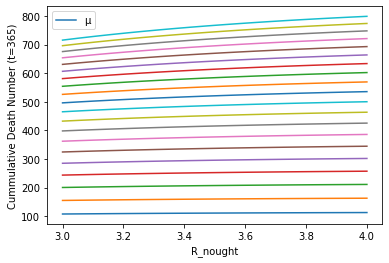

In [9]:
print("Initial Population size:", N)
print("Infected at t=0:", I0)
print ("R_nought ∈ [3.0,4.0] and μ ∈ [0.4%,4%]")
print ("Cummulative Death Number: as shown below")

plt.plot(df.index, df)
plt.xlabel("R_nought")
plt.ylabel("Cummulative Death Number (t=365)")
plt.legend('μ', ncol=2, loc='upper left')
plt.show()

# With regard to the prediction of death number at year end, also known as the cumulative number of deaths, R_nought has little impact as shown in the following graph. However, the death number is highly determined by the death rate μ. 

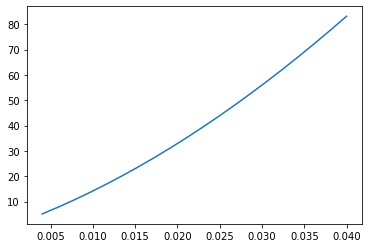

In [10]:
stat = df.astype(float).describe()
spread = stat.loc['max'] - stat.loc['min']
plt.plot(stat.columns, spread)

# There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght, silmulated by max death number associated with highest R_nought=4 minus min death number associated with low R_noght=3, is increasing as well. Therefore, μ magnifies the impact of R_nought. The higher the μ value, the larger impact R_nought can make to the death number.

# 2.Question-1 (c)

(c) Study numerically the effects of a hard versus soft lockdown (by twofor  you  reasonable  values  of β),  in  terms  of D(365d).   What  about  thecumulative  number  of  deaths  after  a  year?   Assumeμ = 1%  and  a γ compatible with R0= 4.

Population size: 3000
Infected at t=0: 10
R0= 4
R_eff=1 at t= 19 d
Cummulative Death Number (t=365) 235.31124858670378


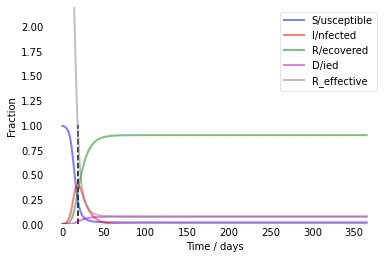

Population size: 3000
Infected at t=0: 10
R0= 4
R_eff=1 at t= 93 d
Cummulative Death Number (t=365) 1174.79262711758


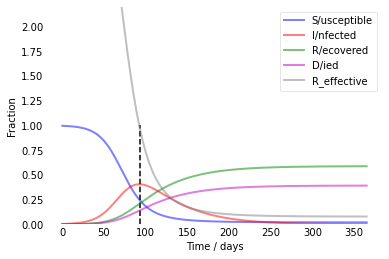

In [17]:
N = 3000 # Population size
I0, R0, D0 = 10, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

#R_nought = β / (Ɣ + μ)
R_nought = 4
β_list = [0.5, 0.1]
μ = 0.01 

# Set time range: 365 days;  Time scale/step: 1 day
t = np.linspace(0, 365, 365)# A grid of time points (in days)

# Initial conditions vector
y0 = S0, I0, R0, D0

######## SIRD model 
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I /(N - μ * I)
    dIdt = β * S * I /(N - μ * I) - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

for β in β_list:
    Ɣ = β / R_nought - μ

    # Integrate the SIRD equations over the time grid t. args takes all parameters
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T # return 4 vectors

    #find the time when R_effective = 1, R_effective = R_nought * S/N, as used in the plot
    t_1 = 0
    for time in range(0,len(S)):
        if R_nought*S[time]/N < 1:  
            t_1 = time
            break

    #Print Info.:
    print("Population size:", N)
    print("Infected at t=0:", I0)
    print ("R0=",R_nought)
    print("R_eff=1 at t=", t_1, "d")
    print("Cummulative Death Number (t=365)", D[-1])

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D/N, 'm', alpha=0.5, lw=2, label='D/ied')
    ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,2.2)
    ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()

